In [ ]:
#Diabetes patients from a gender and race point view
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.count()


encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [ ]:
#checking for missing values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
#Removing not needed columns
df.drop(['admission_type_id','discharge_disposition_id','admission_source_id','payer_code','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','readmitted'],inplace=True, axis=1)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.count()

encounter_id        101766
patient_nbr         101766
race                101766
gender              101766
age                 101766
weight              101766
time_in_hospital    101766
insulin             101766
diabetesMed         101766
dtype: int64

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,insulin,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),?,1,No,No
1,149190,55629189,Caucasian,Female,[10-20),?,3,Up,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,2,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),?,2,Up,Yes
4,16680,42519267,Caucasian,Male,[40-50),?,1,Steady,Yes


In [ ]:
df.drop(['age','weight'],inplace=True, axis=1)


In [ ]:
#droppinf all rows with the value "?"
df.drop(df[df['race'] == '?'].index, inplace = True)

In [ ]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
#the relation between race and diabetesMed
df.groupby(['race'])['diabetesMed'].value_counts()

race             diabetesMed
AfricanAmerican  Yes            14798
                 No              4412
Asian            Yes              475
                 No               166
Caucasian        Yes            58450
                 No             17649
Hispanic         Yes             1551
                 No               486
Other            Yes             1218
                 No               288
Name: diabetesMed, dtype: int64

<Axes: xlabel='race,diabetesMed'>

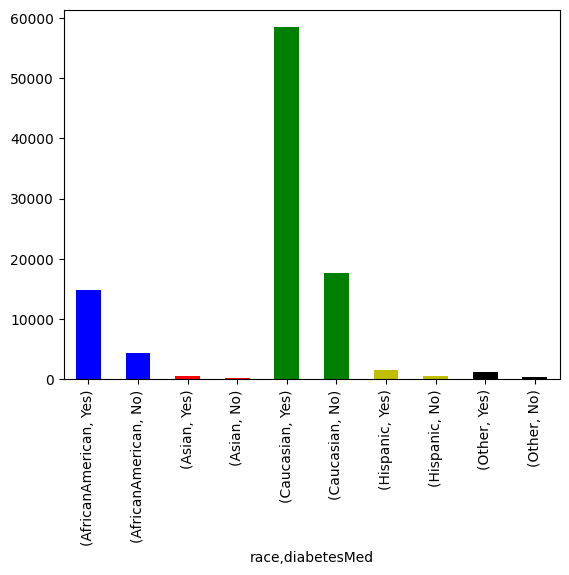

In [ ]:
my_colors = list(islice(cycle(['b', 'b', 'r', 'r','g','g','y','y','k','k']), None, len(df)))
df.groupby(['race'])['diabetesMed'].value_counts().plot(kind='bar',color=my_colors)

In [ ]:
#the relation betyween gender adn diabetesMed
df.groupby(['gender'])['diabetesMed'].value_counts()

gender           diabetesMed
Female           Yes            40867
                 No             12708
Male             Yes            35624
                 No             10293
Unknown/Invalid  Yes                1
Name: diabetesMed, dtype: int64

<Axes: xlabel='gender,diabetesMed'>

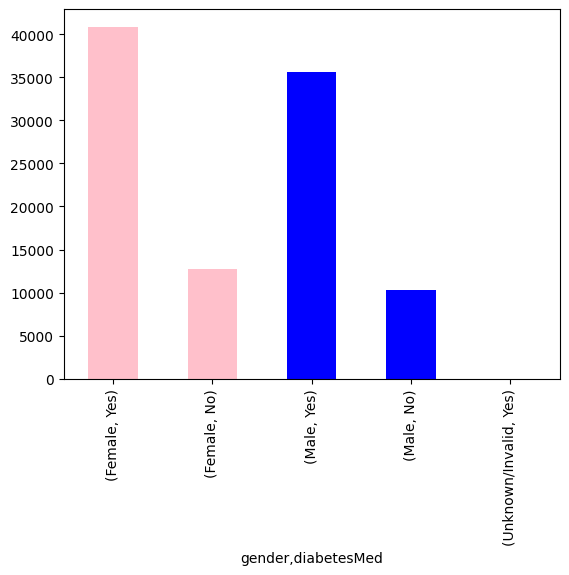

In [ ]:
my_colors = list(islice(cycle(['pink', 'pink', 'b', 'b']), None, len(df)))
df.groupby(['gender'])['diabetesMed'].value_counts().plot(kind='bar',color=my_colors )

<Axes: xlabel='race', ylabel='time_in_hospital'>

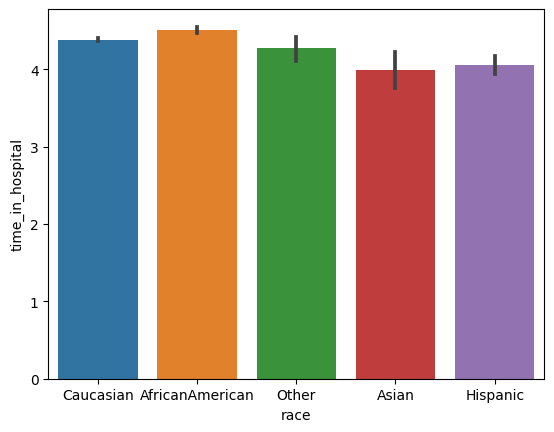

In [ ]:
#the relation between race and time in hospital
sns.barplot(x='race', y='time_in_hospital',data=df)

<Axes: xlabel='gender', ylabel='time_in_hospital'>

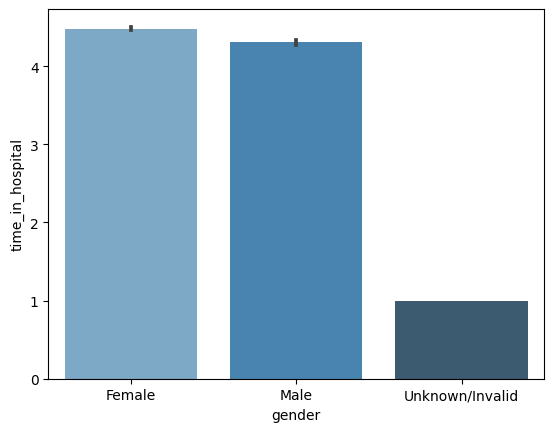

In [ ]:
#the relation between gender and time in hospital
sns.barplot(x='gender', y='time_in_hospital',palette = "Blues_d", data=df)

In [ ]:
#Conclusion: Cauciasns patients are more on diabetesMed than any other race.
#females are more on diabetesMed than males
#African american tend to stay in the hospital more than others races
#females tend to stay more in the hospital more than males